<img src = "images/ADS.jpg" align=left width=200/>




## 探索变量关系及其可视化

### 步骤

1. **准备工作:**  加载相关模块及设置绘图样式
2. **加载数据:**  加载并查看数据
3. **提出问题:**  快速回答一些简单的问题
4. **可视化:**  通过matplotlib及seaborn绘制并验证数据分布
5. **发现:**  数据中是否存在更深层次的的信息?

### 1. 准备工作

In [2]:
# 加载相关模块并设置绘图样式
import warnings; warnings.simplefilter('ignore')


import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib; matplotlib.style.use('ggplot')

from pandas import set_option
set_option("display.max_rows", 16)

LARGE_FIGSIZE = (12, 8)

# inline plots
%matplotlib inline

### 2. 加载数据

In [3]:
# 读取csv数据集
lexp = pd.read_csv('lexpectancy.csv')

In [4]:
# 数据预览
lexp.head()

,Country,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
1,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
3,Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
4,Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [5]:
# 查看数据形状
lexp.shape

(248, 56)

In [6]:
# 查看数据集信息
lexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 56 columns):
Country    248 non-null object
Code       248 non-null object
1960       222 non-null float64
1961       223 non-null float64
1962       223 non-null float64
1963       222 non-null float64
1964       222 non-null float64
1965       223 non-null float64
1966       223 non-null float64
1967       223 non-null float64
1968       223 non-null float64
1969       223 non-null float64
1970       224 non-null float64
1971       223 non-null float64
1972       223 non-null float64
1973       224 non-null float64
1974       223 non-null float64
1975       223 non-null float64
1976       223 non-null float64
1977       223 non-null float64
1978       225 non-null float64
1979       224 non-null float64
1980       225 non-null float64
1981       225 non-null float64
1982       229 non-null float64
1983       226 non-null float64
1984       226 non-null float64
1985       226 non-null float64
1

In [4]:
# 设置行索引为'Country'列
lexp = lexp.set_index('Country')

In [8]:
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


### 3. 初期EDA

**Q1. 1960~2013年间，整体的平均寿命是否延长？**

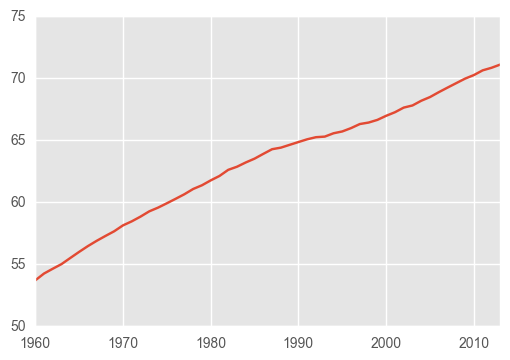

In [9]:
lexp.mean().plot()

**Q2. 1960年哪些国家拥有最长/最短的平均寿命？**

In [10]:
# idxmax 和 idxmin 提供列中对应数据最大值和最小值的索引值
print(lexp['1960'].idxmax())
print(lexp['1960'].idxmin())

Norway
Mali


**Q3. 1960年寿命的最大、最小及平均值？**

In [11]:
# max and min provide the values
print(np.round(lexp['1960'].max()))
print(np.round(lexp['1960'].min()))
print(np.round(lexp['1960'].mean()))

74.0
28.0
54.0


**Q4. 任意年的最大、最小、平均寿命？**

In [15]:
def high_low_mean(year):
    print("{}年：".format(year))
    print(lexp[year].idxmin(), "有最小寿命值:", np.round(lexp[year].min()))
    print(lexp[year].idxmax(), "有最大寿命值:", np.round(lexp[year].max()))
    print("平均寿命值: ", np.round(lexp[year].mean()))

In [16]:
high_low_mean('2000')

2000年：
Sierra Leone 有最小寿命值: 39.0
Japan 有最大寿命值: 81.0
平均寿命值:  67.0


**Q5. 哪个国家有最大/最小的寿命增长率？**

In [39]:
# gain = (value_in_2013 - value_in_1960)/value_in_1960
lexp['gain'] = np.round((lexp['2013']-lexp['1960'])/lexp['1960'],2)

In [40]:
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,gain
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659,0.15
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268,0.86
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171,0.57
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244,0.25


In [41]:
gain = lexp['gain']
gain.head()

Country
Aruba          0.15
Andorra         NaN
Afghanistan    0.86
Angola         0.57
Albania        0.25
Name: gain, dtype: float64

In [42]:
# 去掉空值并排序
lexp_gain = gain.dropna().sort_values(ascending=False)

In [43]:
lexp_gain.head()

Country
Bhutan         1.14
Maldives       1.06
Mali           1.04
Timor-Leste    1.00
Nepal          0.97
Name: gain, dtype: float64

In [44]:
# 增长率最高的10个国家
lexp_gain.head(10)

Country
Bhutan         1.14
Maldives       1.06
Mali           1.04
Timor-Leste    1.00
Nepal          0.97
Gambia, The    0.87
Afghanistan    0.86
Yemen, Rep.    0.85
Oman           0.80
Tunisia        0.75
Name: gain, dtype: float64

In [25]:
# 增长率最低的10个国家
lexp_gain.tail(10)

Country
Guyana                0.10
Slovak Republic       0.09
Zimbabwe              0.08
Russian Federation    0.08
Bulgaria              0.08
Belarus               0.07
Lesotho               0.06
Lithuania             0.06
Latvia                0.06
Ukraine               0.04
Name: gain, dtype: float64

In [26]:
# 删除列
del lexp['gain']

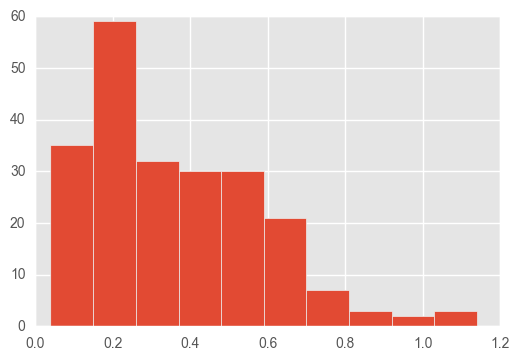

In [27]:
# 增长率直方图
lexp_gain.hist()

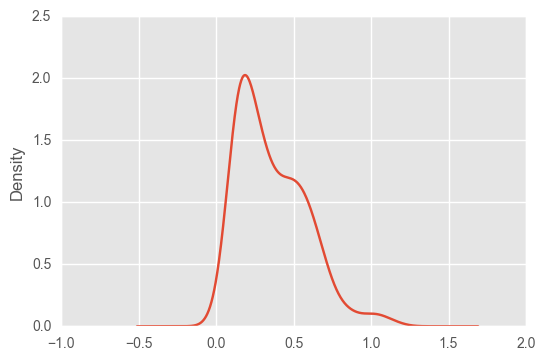

In [45]:
# 增长率核密度估计
lexp_gain.plot(kind='kde')

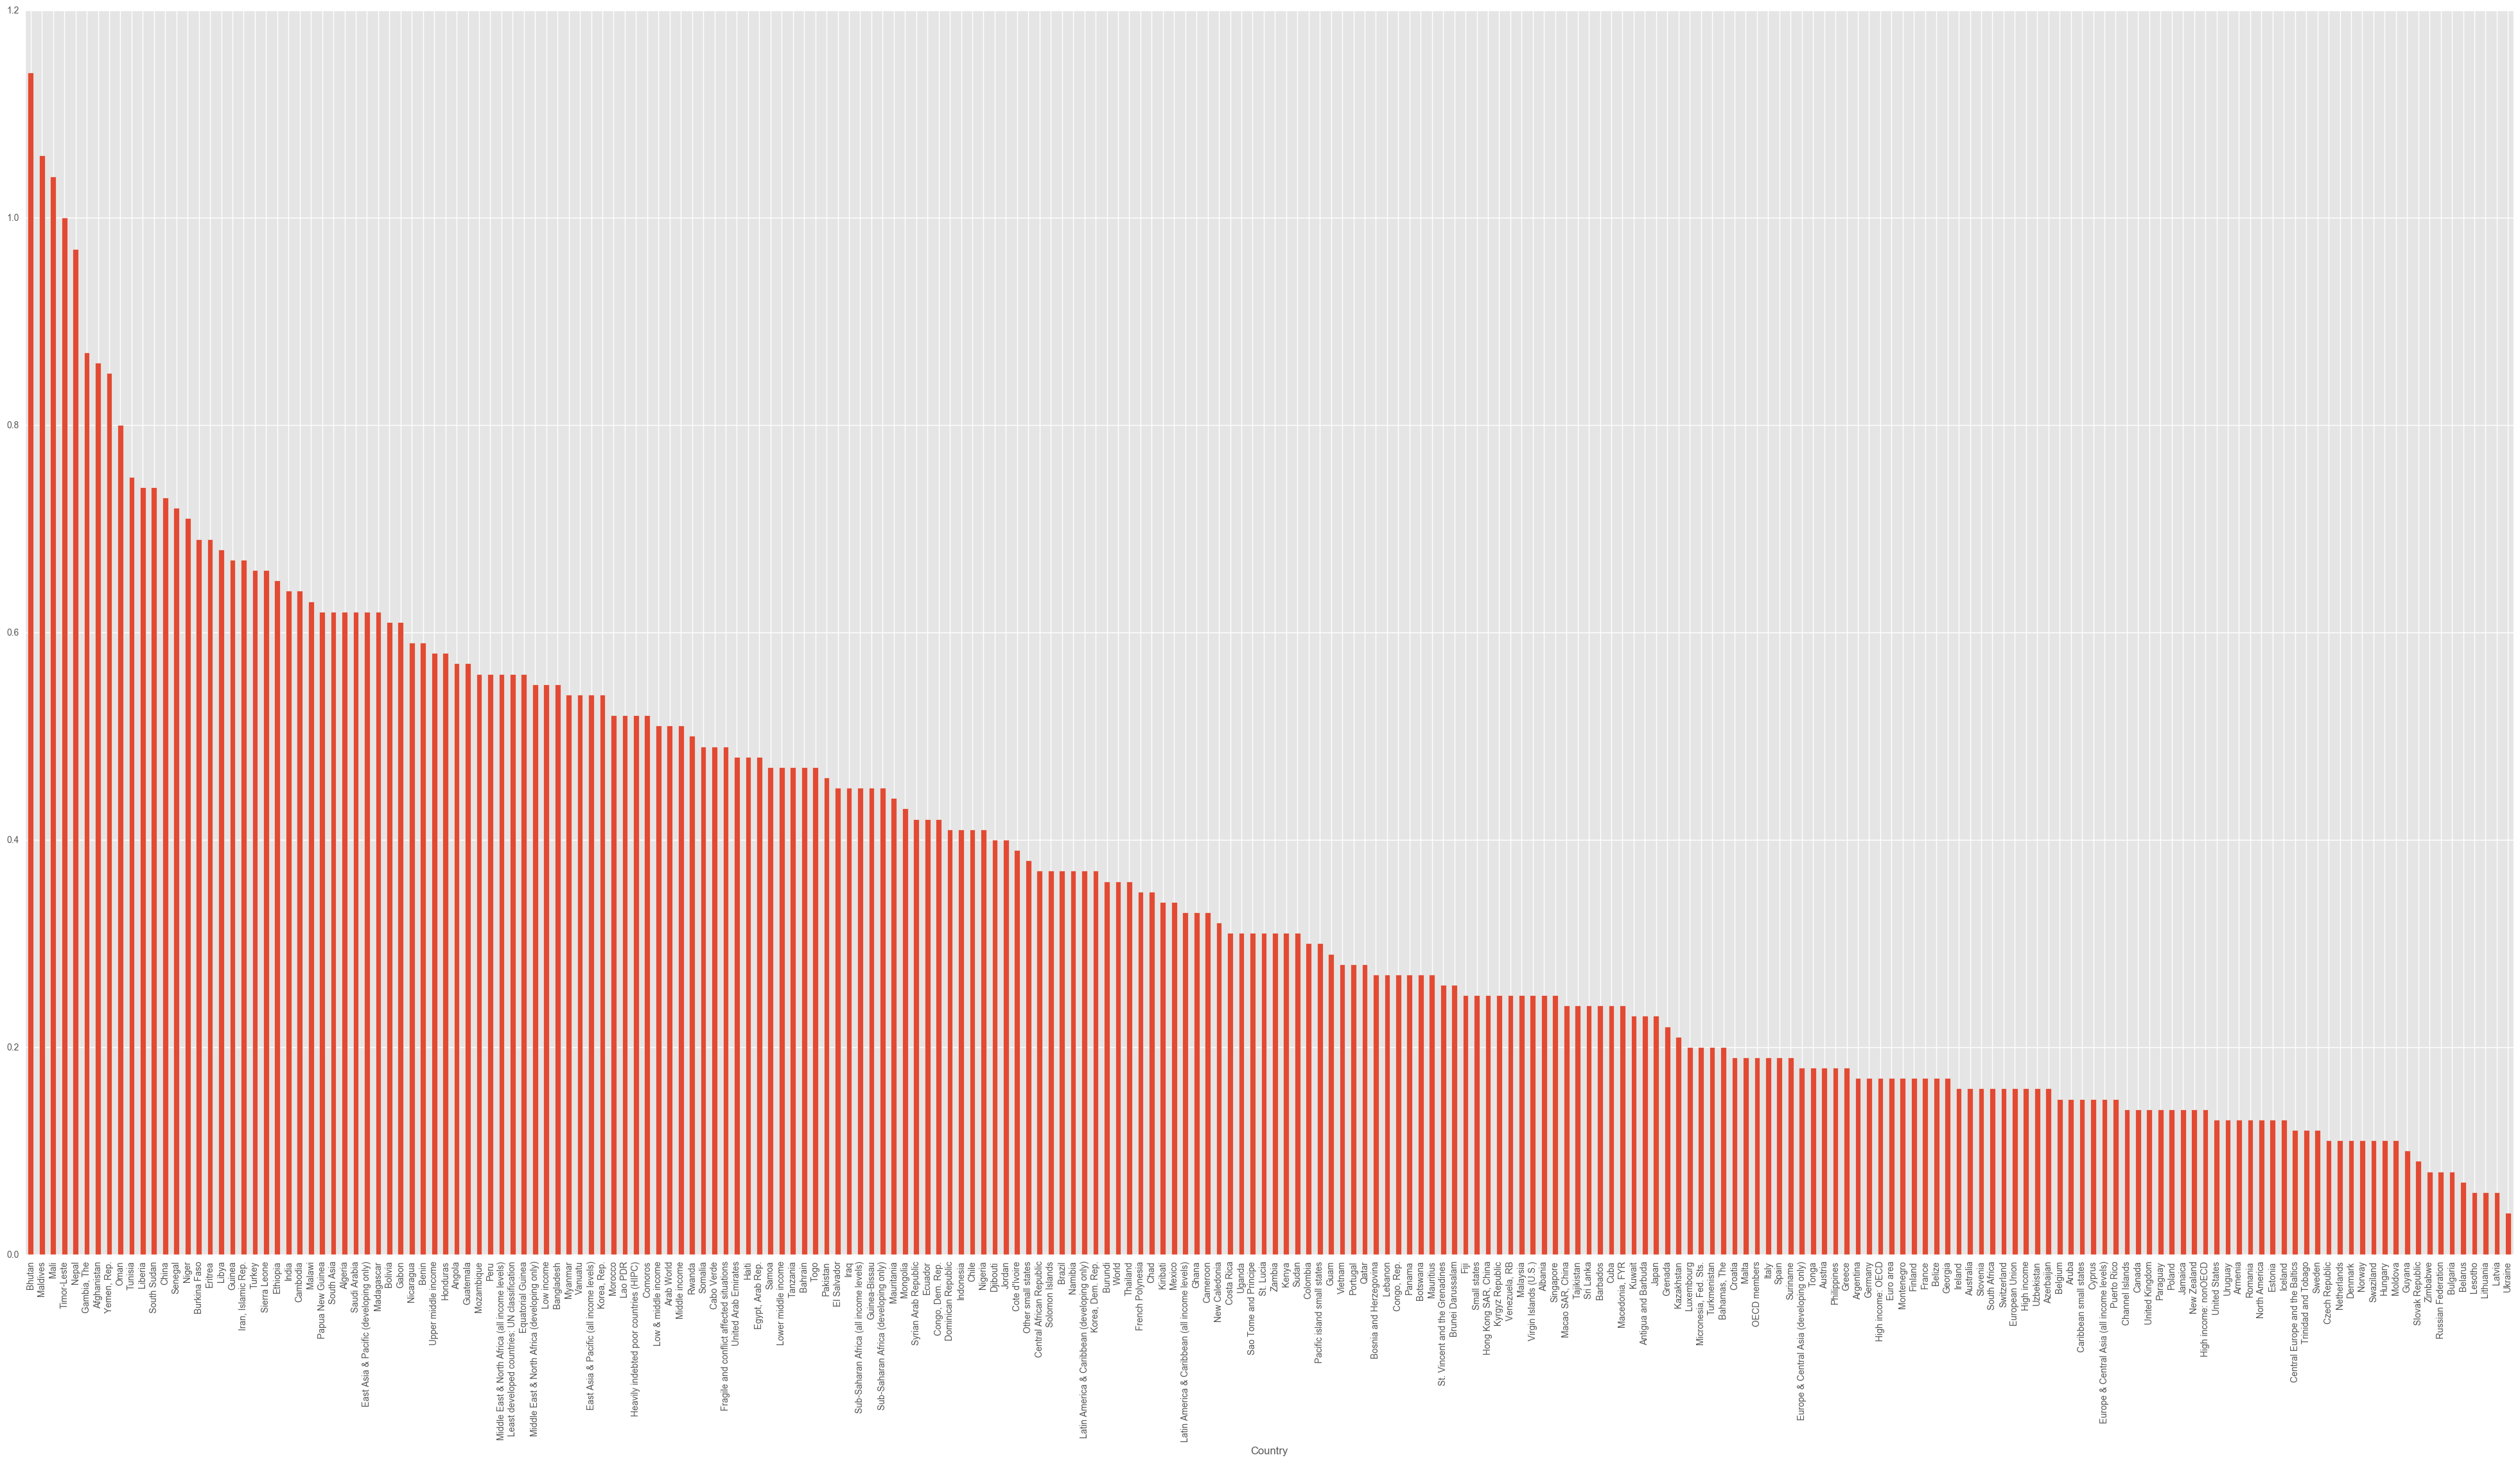

In [29]:
# 增长率柱状图，并保存
ax = lexp_gain.plot(kind='bar', figsize=(50,25));
fig = ax.get_figure()
fig.savefig('gains.png')

## 4. 变量关系及分布的可视化

### 直方图

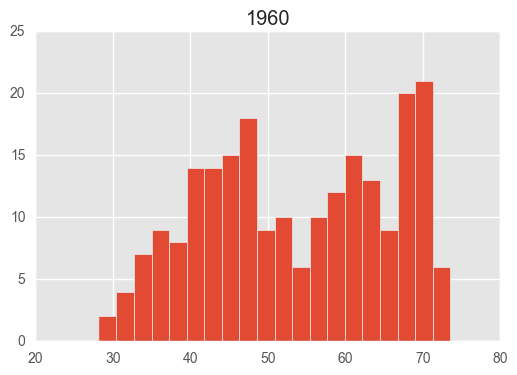

In [30]:
lexp.hist(column='1960', bins=20);

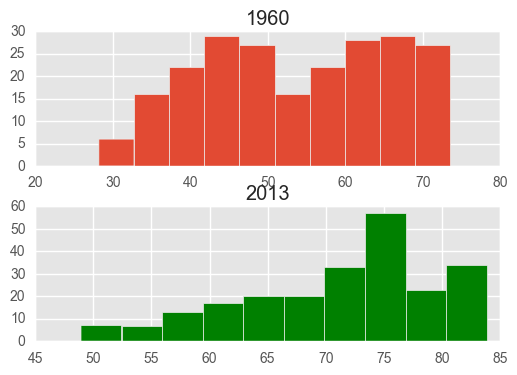

In [31]:
# 使用subplots对比1960和2013年的数据分布s
f, (ax1, ax2) = plt.subplots(2);
lexp.hist(column='1960', ax=ax1);
lexp.hist(column='2013', color='green', ax=ax2);

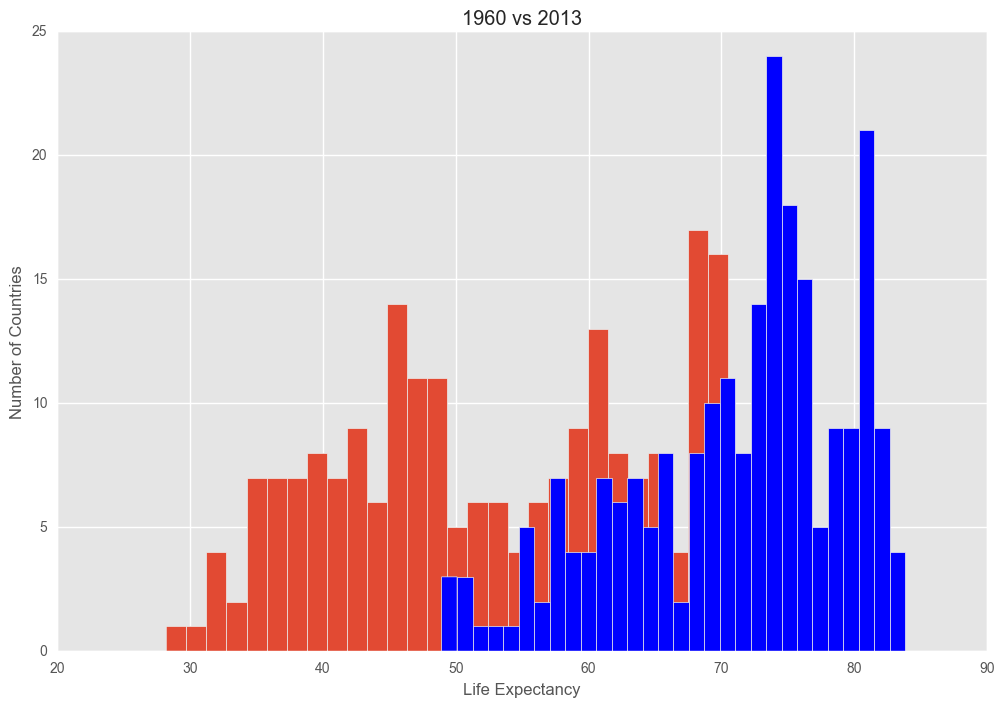

In [32]:
# 同一个图中绘制两个子图
f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
lexp.hist(column='1960',bins=30, ax=ax1);
lexp.hist(column='2013',bins=30, color='blue', ax=ax1);
plt.xlabel('Life Expectancy')
plt.ylabel('Number of Countries')
plt.title("1960 vs 2013")

In [33]:
# 定义函数比较任意两年的分布比较
def compare_hist(year1,year2):
    f, (ax1) = plt.subplots(1,figsize=LARGE_FIGSIZE)
    lexp.hist(column=year1,bins=20, ax=ax1);
    lexp.hist(column=year2,bins=20, color='blue', ax=ax1);
    plt.xlabel('Life Expectancy')
    plt.ylabel('Number of Countries')
    plt.title(str(year1) + " vs " + str(year2))

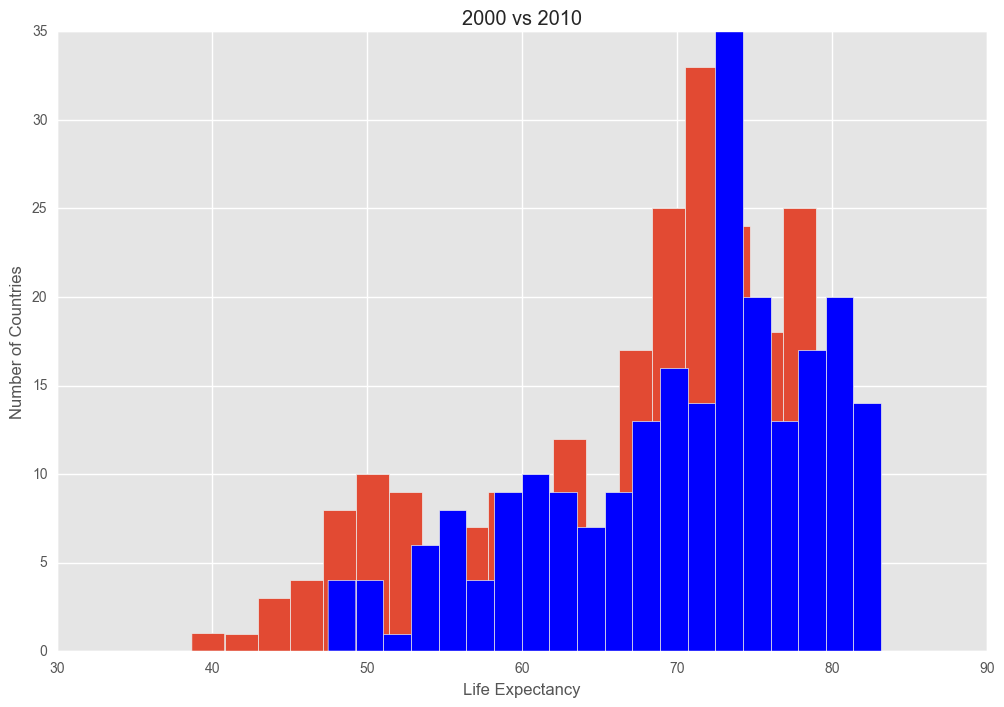

In [36]:
compare_hist('2000','2010')

### 核密度估计 及 Rugplot

In [57]:
# 重新读取csv数据集
lexp['2010'].dropna()

Country
Aruba                   74.953537
Afghanistan             58.970829
Angola                  50.654171
Albania                 76.978512
Arab World              70.003017
United Arab Emirates    76.675244
Argentina               75.484976
Armenia                 74.226341
                          ...    
West Bank and Gaza      72.640488
World                   70.471161
Samoa                   72.417000
Yemen, Rep.             62.768732
South Africa            54.390756
Congo, Dem. Rep.        56.896146
Zambia                  56.383854
Zimbabwe                49.574659
Name: 2010, Length: 233, dtype: float64

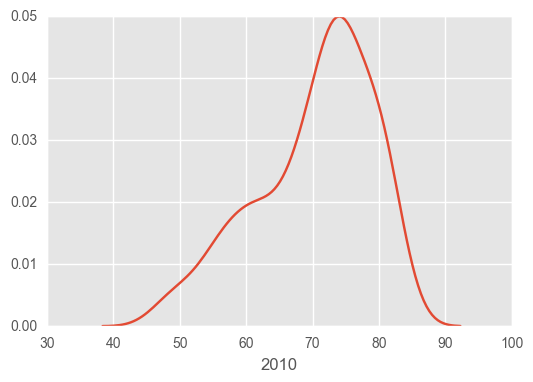

In [7]:
sns.distplot(lexp['2010'].dropna(), hist=False, kde=True, rug=False, bins=25);

In [8]:
def sns_compare(year1,year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    for yr in range(int(year1),int(year2)):
        sns.distplot(lexp[str(yr)].dropna(), hist=False, kde=True, rug=False, bins=25)

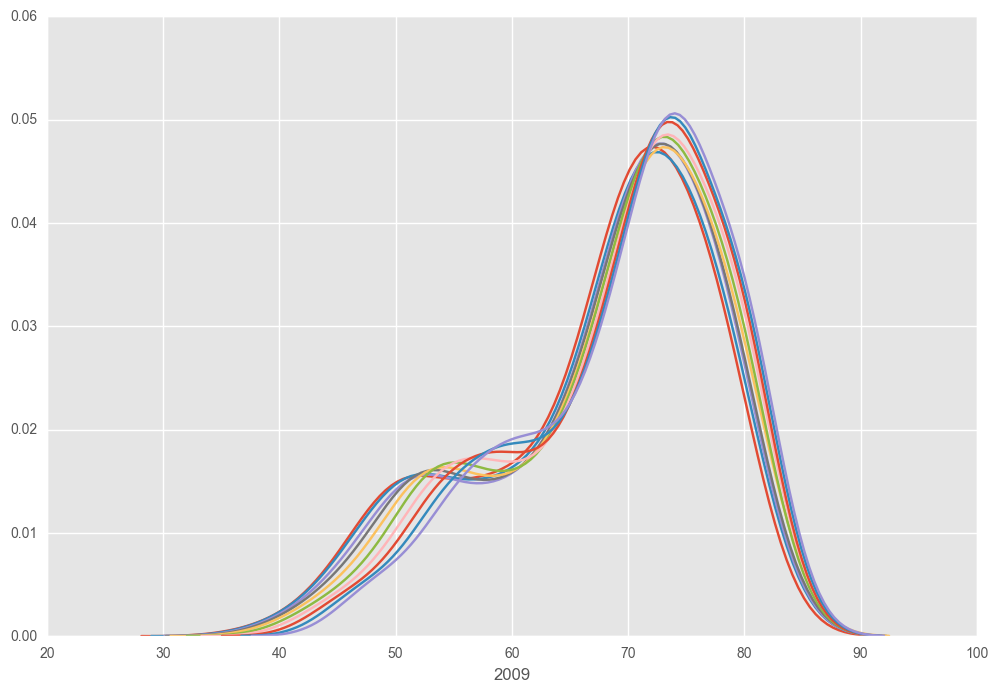

In [9]:
sns_compare('2000','2010')

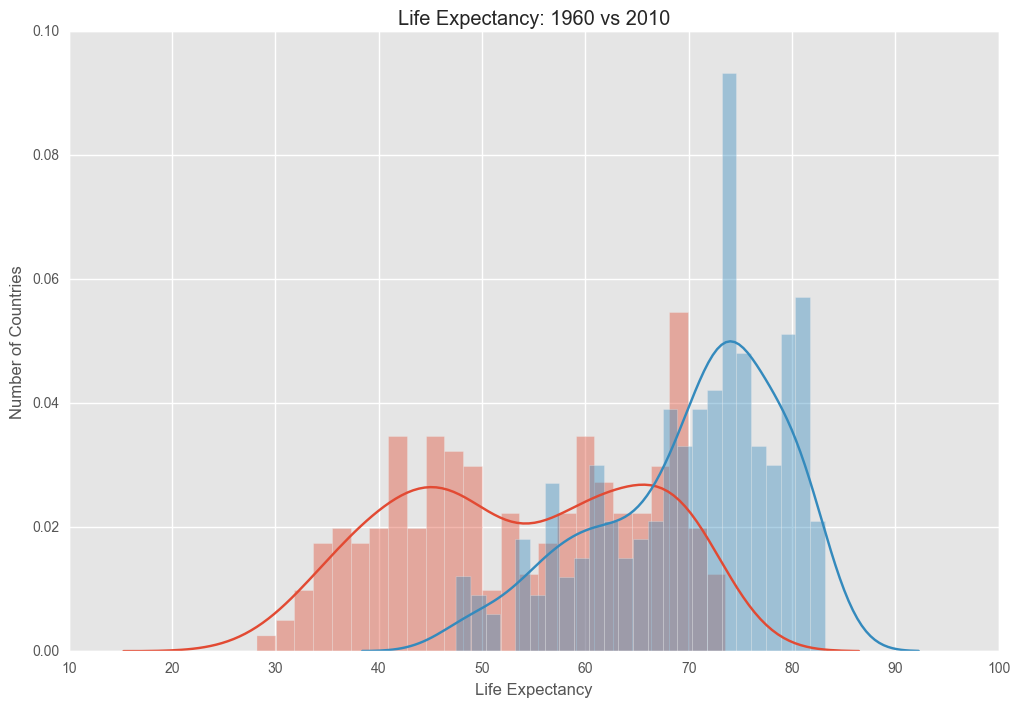

In [12]:
# 同一图中对比
f, ax1 = plt.subplots(1, figsize=LARGE_FIGSIZE)
sns.distplot(lexp['1960'].dropna(),hist=True, kde=True, rug=False, bins=25);
sns.distplot(lexp['2010'].dropna(),hist=True, kde=True, rug=False, bins=25);
plt.xlabel('Life Expectancy');
plt.ylabel('Number of Countries');
plt.title('Life Expectancy: 1960 vs 2010')

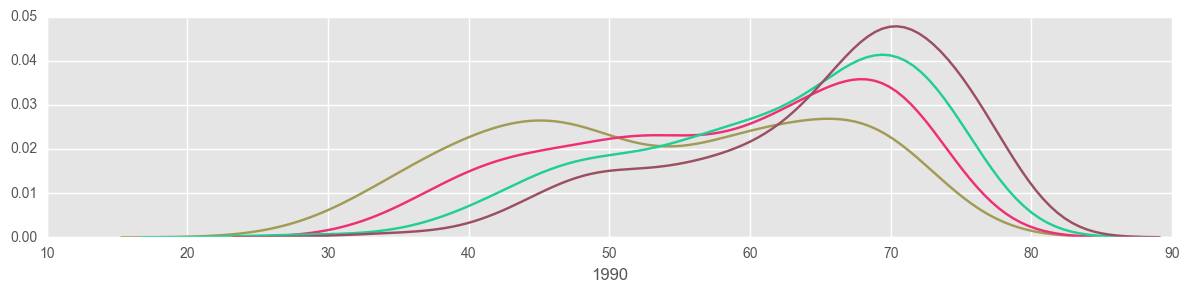

In [15]:
# FaceGrid
fig = sns.FacetGrid(lexp,aspect=4)
decades = [str(year) for year in range(1960,2000) if year%10==0]
for year in decades:
    fig.map(sns.kdeplot, year, color=np.random.rand(3,1))

#### 盒形图

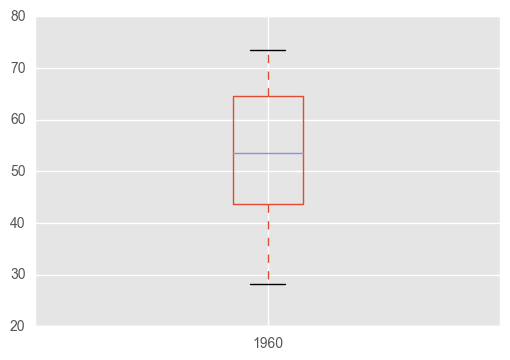

In [18]:
lexp.boxplot(column='1960');

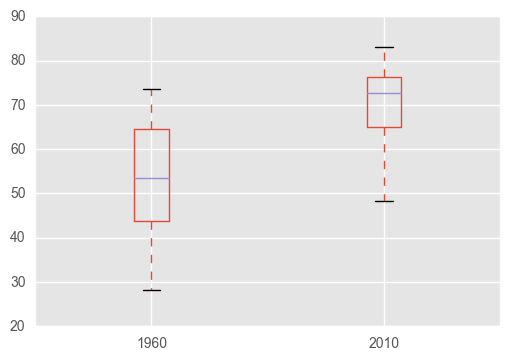

In [19]:
lexp.boxplot(column=['1960','2010']);

In [20]:
def boxplot_compare(year1,year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    lexp.boxplot(column=[year1,year2]);

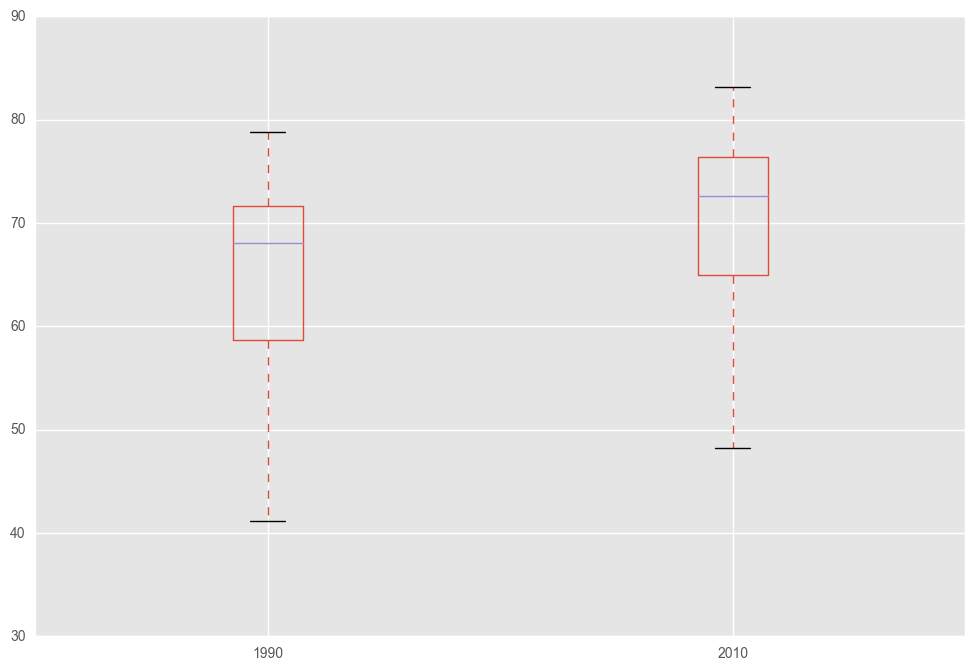

In [24]:
boxplot_compare('1990', '2010');

#### 小提琴图

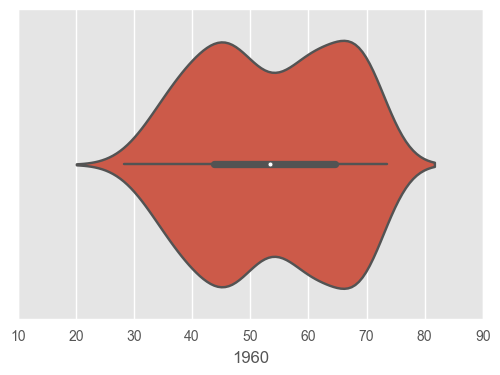

In [25]:
sns.violinplot(lexp['1960'])

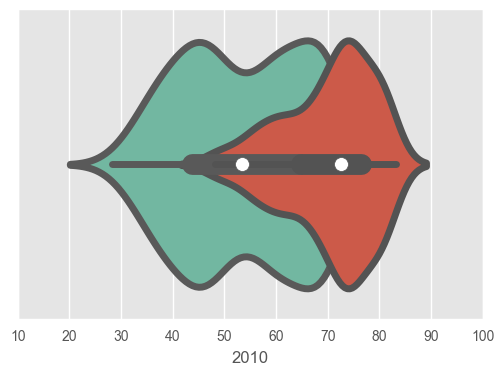

In [26]:
sns.violinplot(lexp['1960'], palette="Set2",linewidth=5)
sns.violinplot(lexp['2010'],linewidth=5)

In [27]:
def violin_compare(year1, year2):
    f, (ax1) = plt.subplots(1, figsize=LARGE_FIGSIZE)
    sns.violinplot(lexp[year1], palette="Set2")
    sns.violinplot(lexp[year2])
    

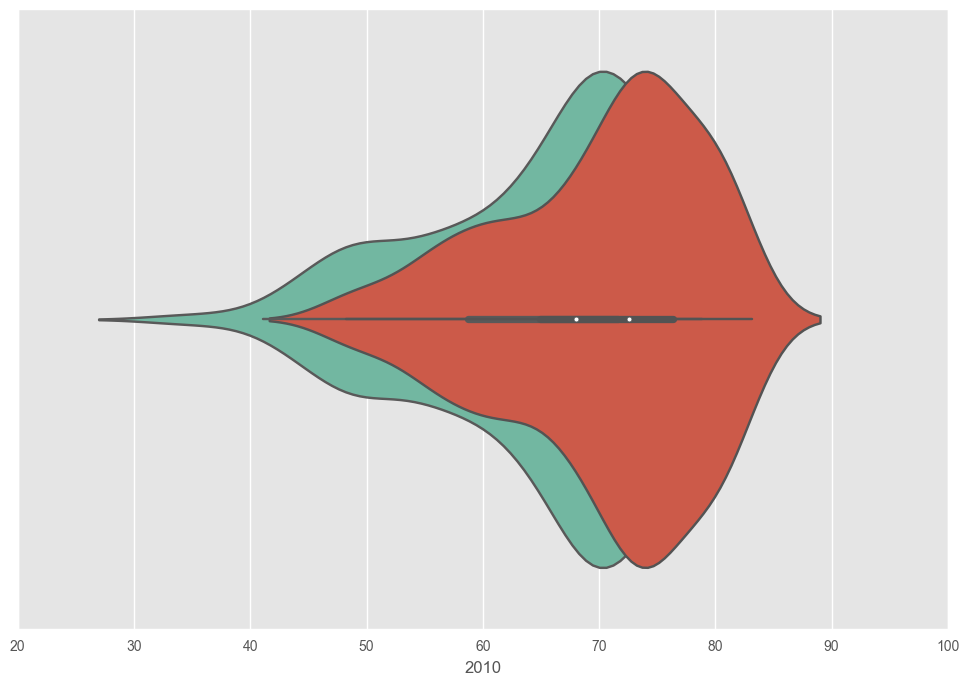

In [28]:
violin_compare('1990', '2010')

## 5. 发现

In [29]:
lexp.head()

,Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,65.569366,65.988024,66.365537,66.713976,67.044293,67.369756,67.699000,68.034683,68.377146,...,74.090854,74.228073,74.376195,74.526756,74.675732,74.818146,74.953537,75.081390,75.205756,75.328659
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,32.328512,32.777439,33.219902,33.657878,34.092878,34.525390,34.957415,35.389415,35.822415,...,56.626317,57.027244,57.432561,57.833829,58.225024,58.603683,58.970829,59.327951,59.679610,60.028268
Angola,AGO,32.984829,33.386220,33.787585,34.188463,34.590341,34.992220,35.395098,35.799976,36.205854,...,48.003512,48.538805,49.007049,49.435732,49.847390,50.251024,50.654171,51.059317,51.464000,51.866171
Albania,ALB,62.254366,63.273463,64.162854,64.887098,65.438195,65.827390,66.089317,66.287220,66.474951,...,75.839000,76.089390,76.290537,76.464854,76.632317,76.801878,76.978512,77.163220,77.350463,77.537244


In [30]:
# 数据转置
transform = lexp.T

In [31]:
transform.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
Code,ABW,AND,AFG,AGO,ALB,ARB,ARE,ARG,ARM,ASM,...,VNM,VUT,PSE,WLD,WSM,YEM,ZAF,COD,ZMB,ZWE
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293


In [34]:
# 去掉Code行
t = transform.ix[1:]

In [35]:
# verify first few lines
t.head()

Country,Aruba,Andorra,Afghanistan,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Vietnam,Vanuatu,West Bank and Gaza,World,Samoa,"Yemen, Rep.",South Africa,"Congo, Dem. Rep.",Zambia,Zimbabwe
1960,65.5694,NaN,32.3285,32.9848,62.2544,46.8471,52.2432,65.2155,65.8635,NaN,...,59.067,46.4875,NaN,52.4998,49.9695,34.3638,49.0363,41.018,45.1098,51.5425
1961,65.988,NaN,32.7774,33.3862,63.2735,47.4276,53.2866,65.3385,66.2844,NaN,...,59.7442,47.0881,NaN,53.0044,50.4695,34.4732,49.4298,41.2335,45.4875,51.915
1962,66.3655,NaN,33.2199,33.7876,64.1629,48.0072,54.327,65.4326,66.7099,NaN,...,60.4105,47.6882,NaN,53.4718,50.9695,34.7396,49.8133,41.4515,45.8537,52.2779
1963,66.714,NaN,33.6579,34.1885,64.8871,48.5895,55.3635,65.5094,67.1379,NaN,...,61.043,48.2873,NaN,54.0974,51.4695,35.1868,50.1958,41.678,46.2087,52.6293
1964,67.0443,NaN,34.0929,34.5903,65.4382,49.1748,56.3926,65.5824,67.5654,NaN,...,61.6071,48.8868,NaN,54.913,51.9695,35.8129,50.5818,41.918,46.5577,52.9717


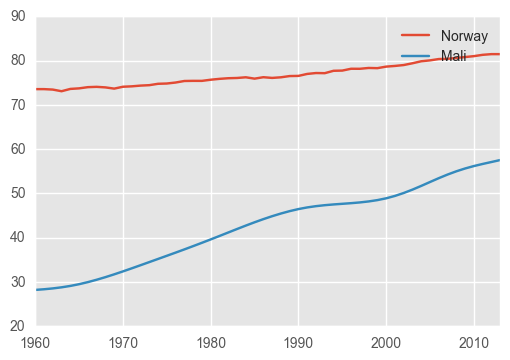

In [37]:
# 比较两个国家的寿命趋势
t['Norway'].plot()
t['Mali'].plot()
plt.legend();

In [46]:
print("Norway Percentage Gain = ", lexp_gain['Norway'])
print("Mali Percentage Gain = ", lexp_gain['Mali'])

Norway Percentage Gain =  0.11
Mali Percentage Gain =  1.04


### 1960 - 2013寿命趋势可视化

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55]), <a list of 55 Text xticklabel objects>)

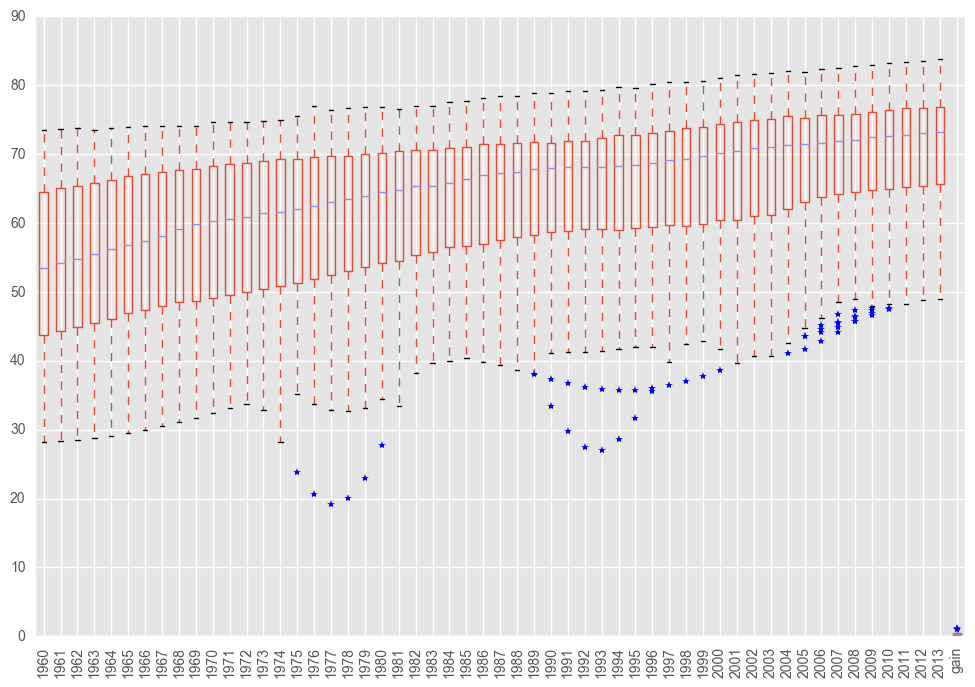

In [49]:
fig = plt.figure(figsize=LARGE_FIGSIZE)
lexp.boxplot(sym="*") # sym表示盒形图中的异常值
plt.xticks(rotation='vertical')

In [50]:
lexp['1977'].idxmin()

'Cambodia'

In [51]:
lexp['1993'].idxmin()

'Rwanda'

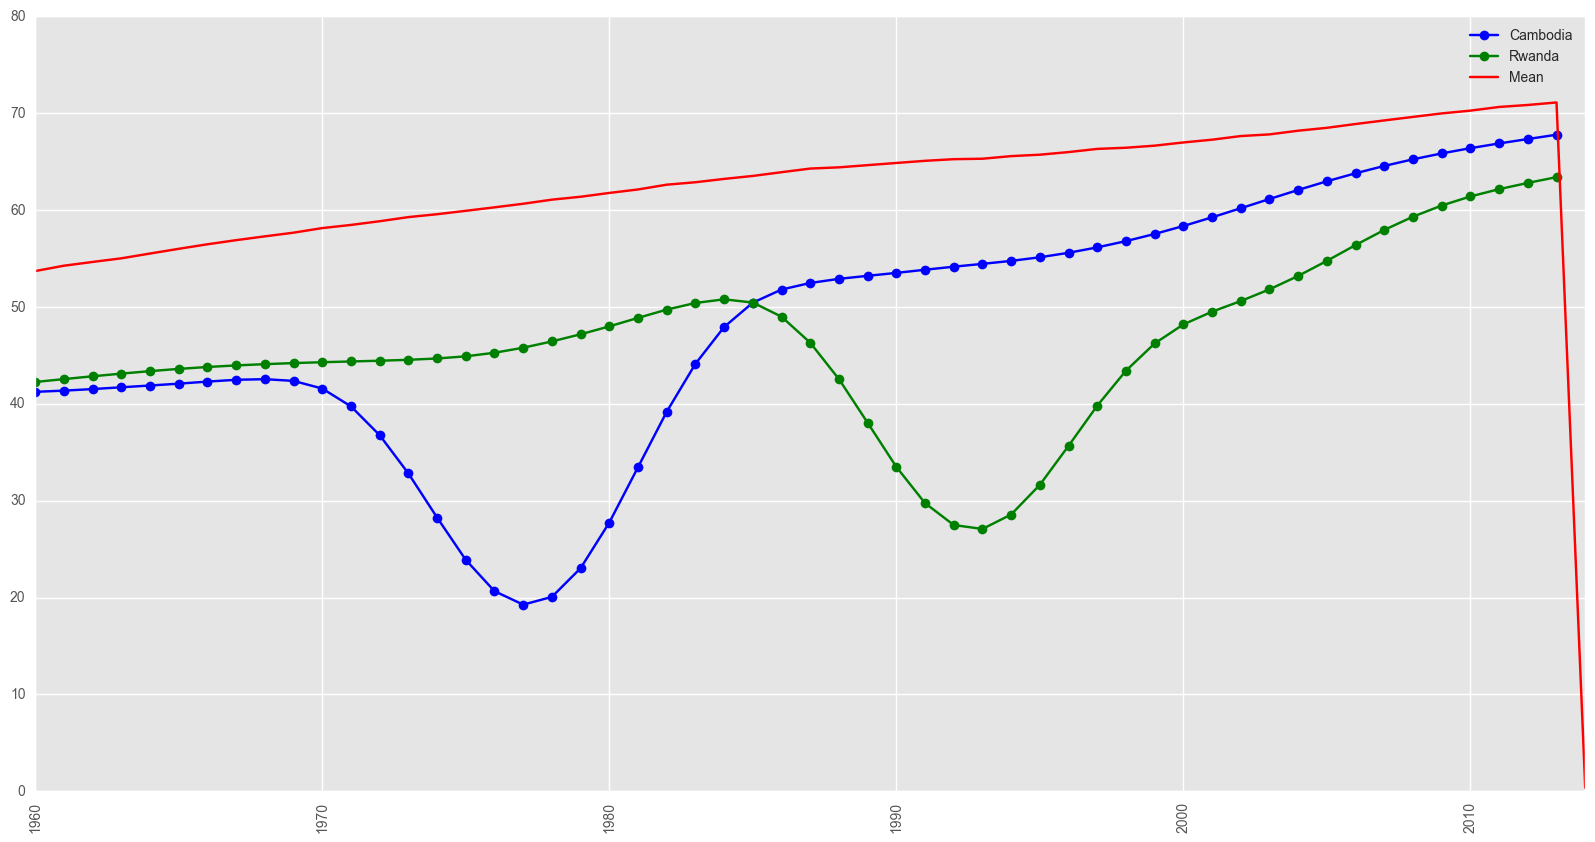

In [52]:
fig = plt.figure(figsize=(20,10), dpi=200)
t['Cambodia'].plot(marker='o', color='blue');
t['Rwanda'].plot(marker='o',color='green');
lexp.mean().plot(color='red', label='Mean');
plt.xticks(rotation='vertical');
plt.legend();

### 国家间比较

In [53]:
def compare(countries):
    for country in countries:
        t[country].plot(figsize=(20,10))
        print(country, lexp_gain[country])
    plt.legend();

In [54]:
# create a list of the ten countries with lowest life expectancy in 1960
bot10 = lexp.sort_values(by='1960')['1960'].head(10).index.tolist()

In [55]:
# create a list of the ten countries with the highest life expectancy in 1960
top10 = lexp.sort_values(by='1960')['1960'].dropna().tail(10).index.tolist()

In [56]:
bot10

['Mali',
 'Sierra Leone',
 'South Sudan',
 'Gambia, The',
 'Afghanistan',
 'Bhutan',
 'Angola',
 'Timor-Leste',
 'Yemen, Rep.',
 'Burkina Faso']

Mali 1.04
Sierra Leone 0.66
South Sudan 0.74
Gambia, The 0.87
Afghanistan 0.86
Bhutan 1.14
Angola 0.57
Timor-Leste 1.0
Yemen, Rep. 0.85
Burkina Faso 0.69


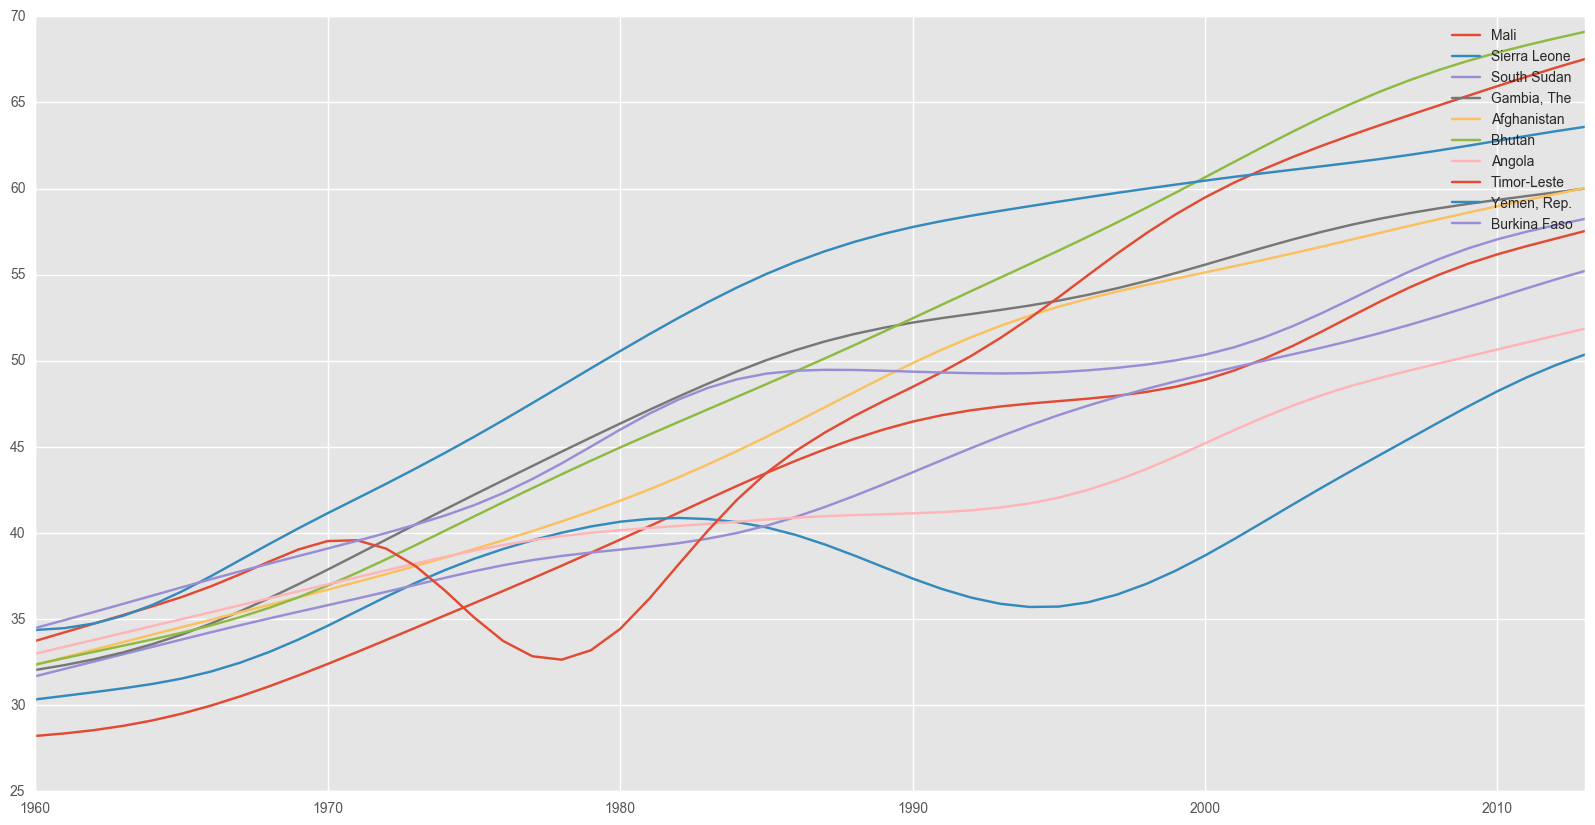

In [57]:
compare(bot10)

Australia 0.16
United Kingdom 0.14
Canada 0.14
New Zealand 0.14
Switzerland 0.16
Denmark 0.11
Sweden 0.12
Netherlands 0.11
Iceland 0.13
Norway 0.11


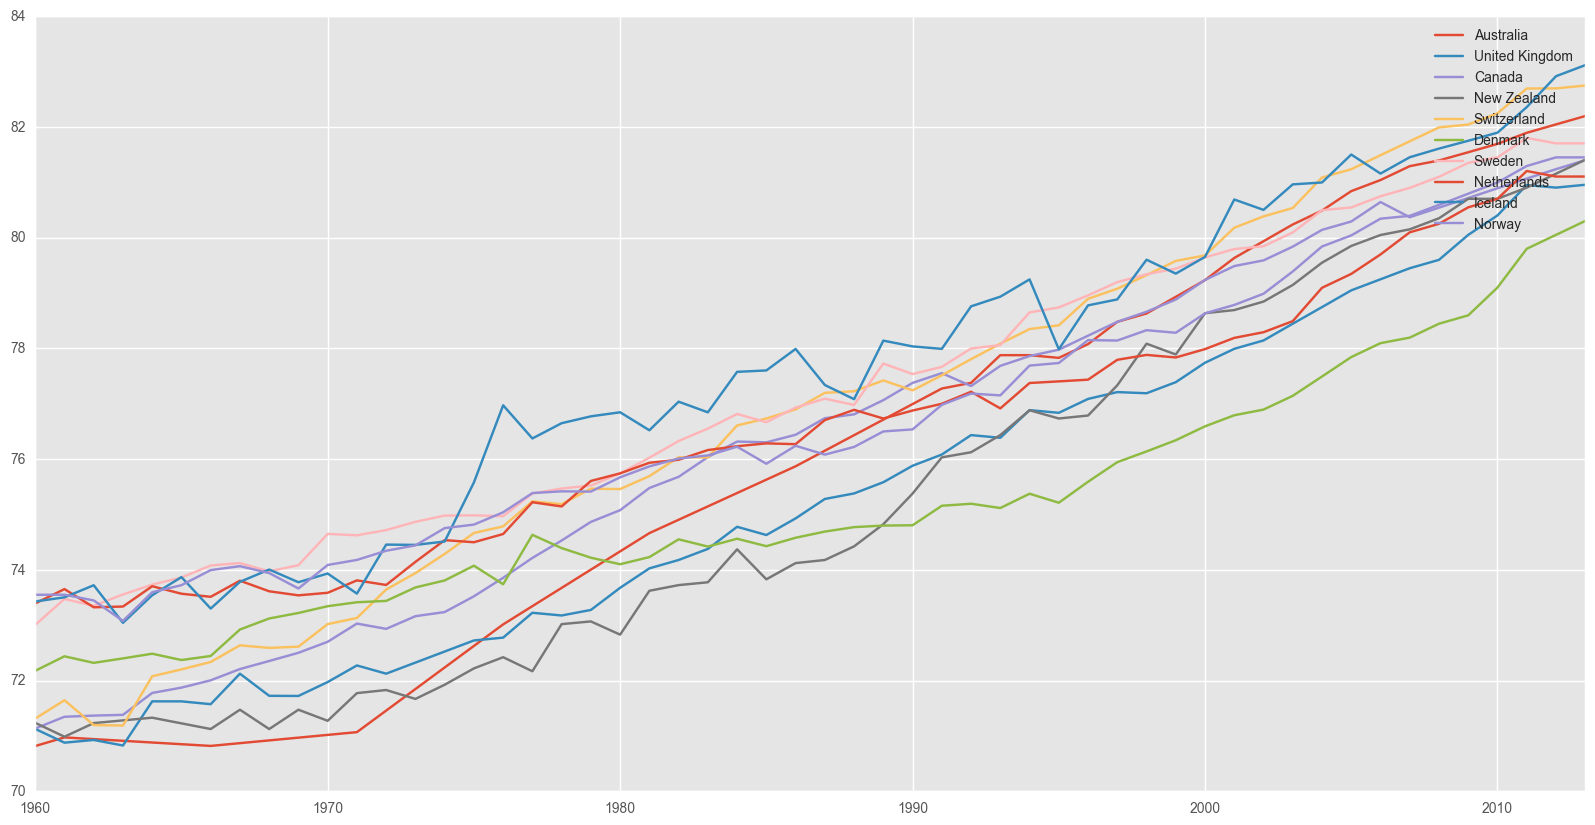

In [58]:
compare(top10)

In [59]:
sub_sahara=['Namibia','Botswana','South Africa','Uganda','Kenya']

Namibia 0.37
Botswana 0.27
South Africa 0.16
Uganda 0.31
Kenya 0.31


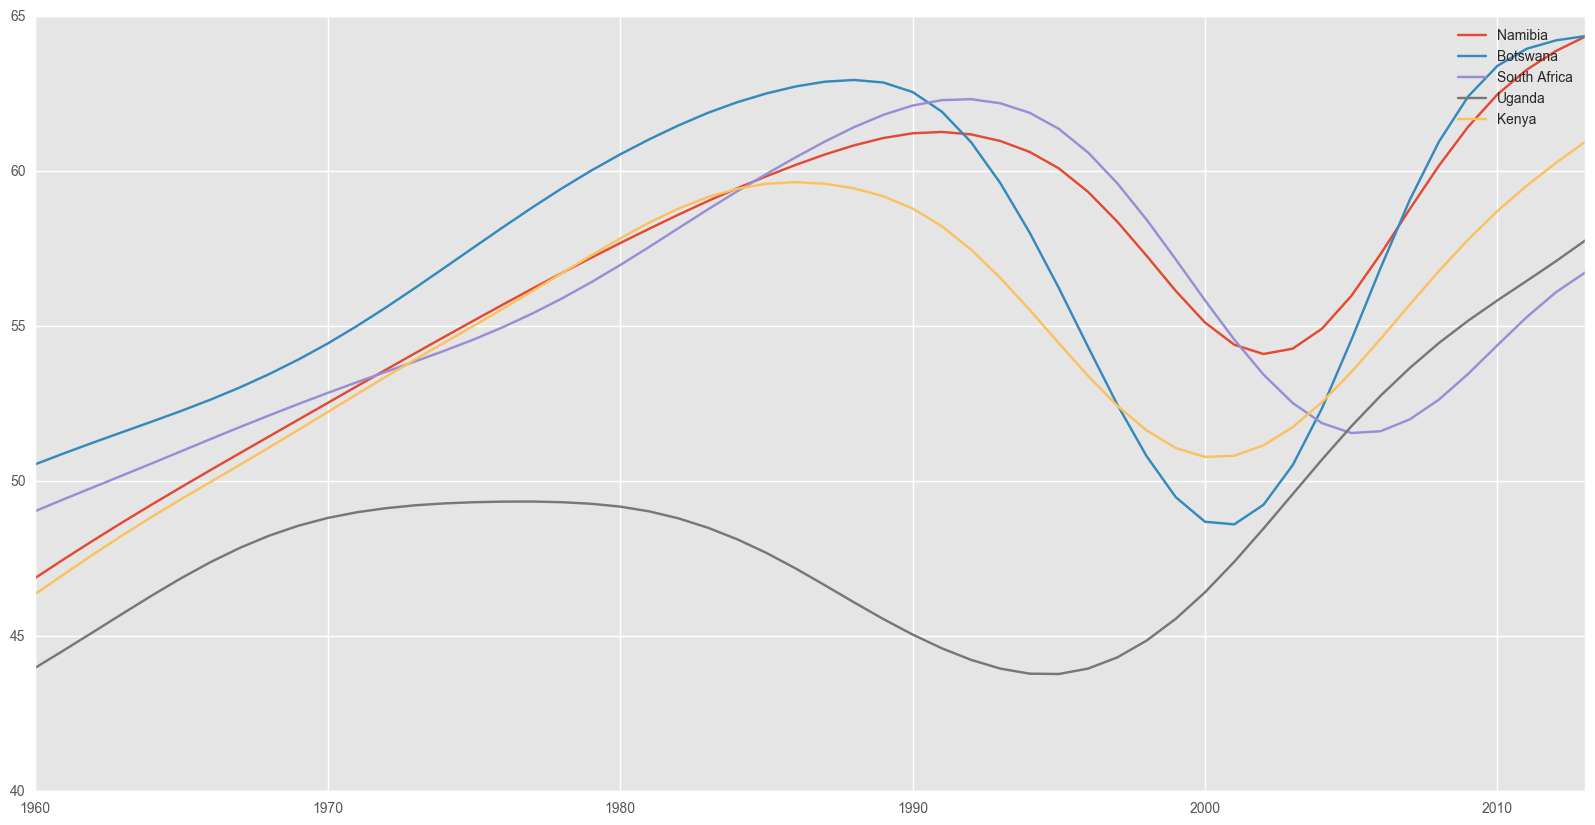

In [60]:
compare(sub_sahara)

In [61]:
latam = ['Argentina','Bolivia','Colombia','Chile','Brazil','Paraguay','Uruguay']

Argentina 0.17
Bolivia 0.61
Colombia 0.3
Chile 0.41
Brazil 0.37
Paraguay 0.14
Uruguay 0.13


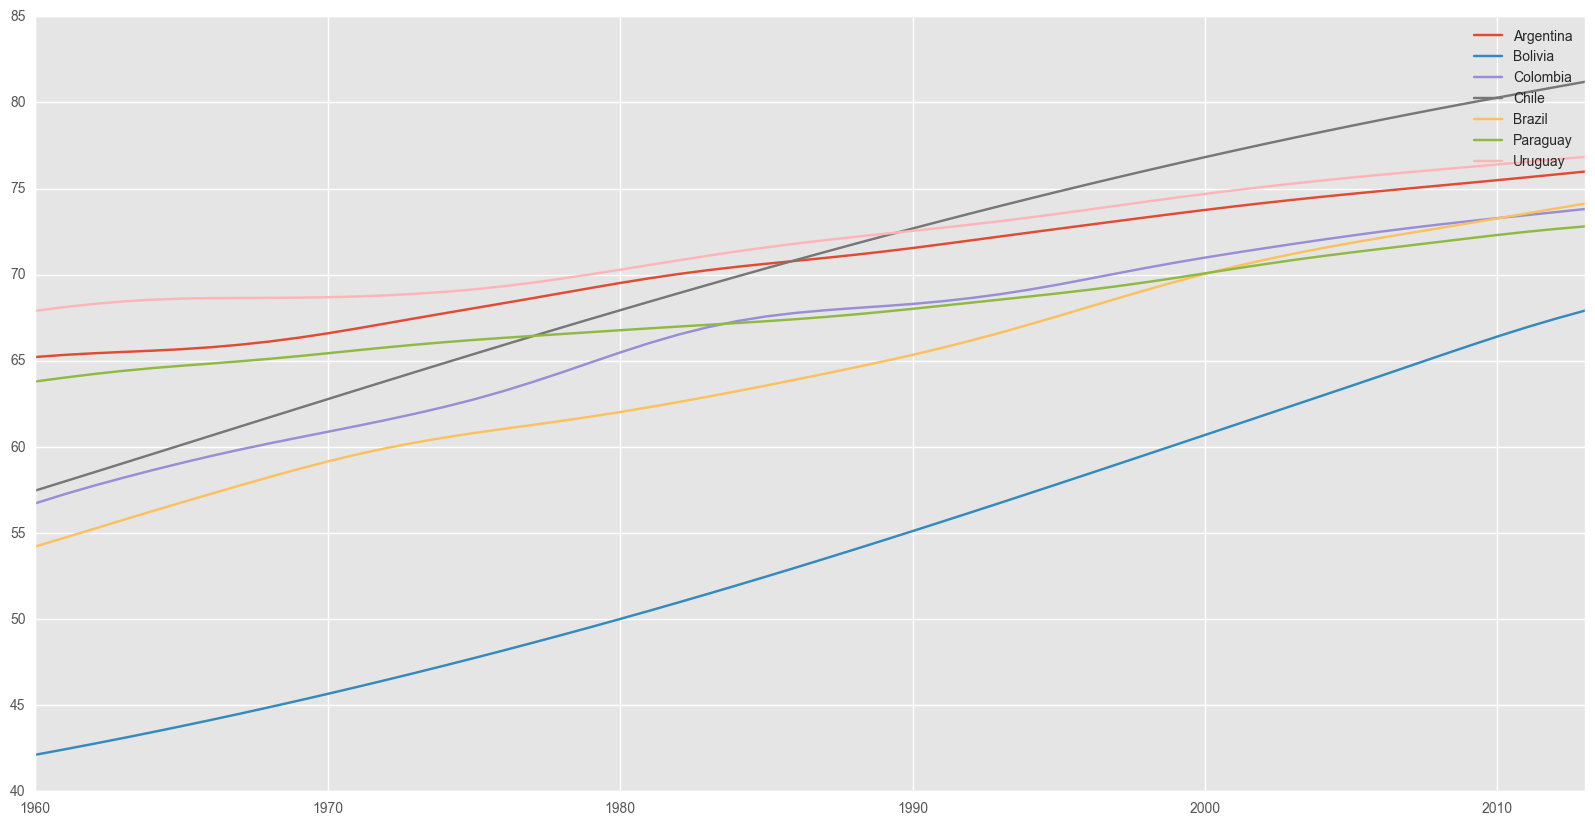

In [62]:
compare(latam)

In [63]:
africa = ['Nigeria','South Africa','Niger','Tanzania','Zambia']

Nigeria 0.41
South Africa 0.16
Niger 0.71
Tanzania 0.47
Zambia 0.31


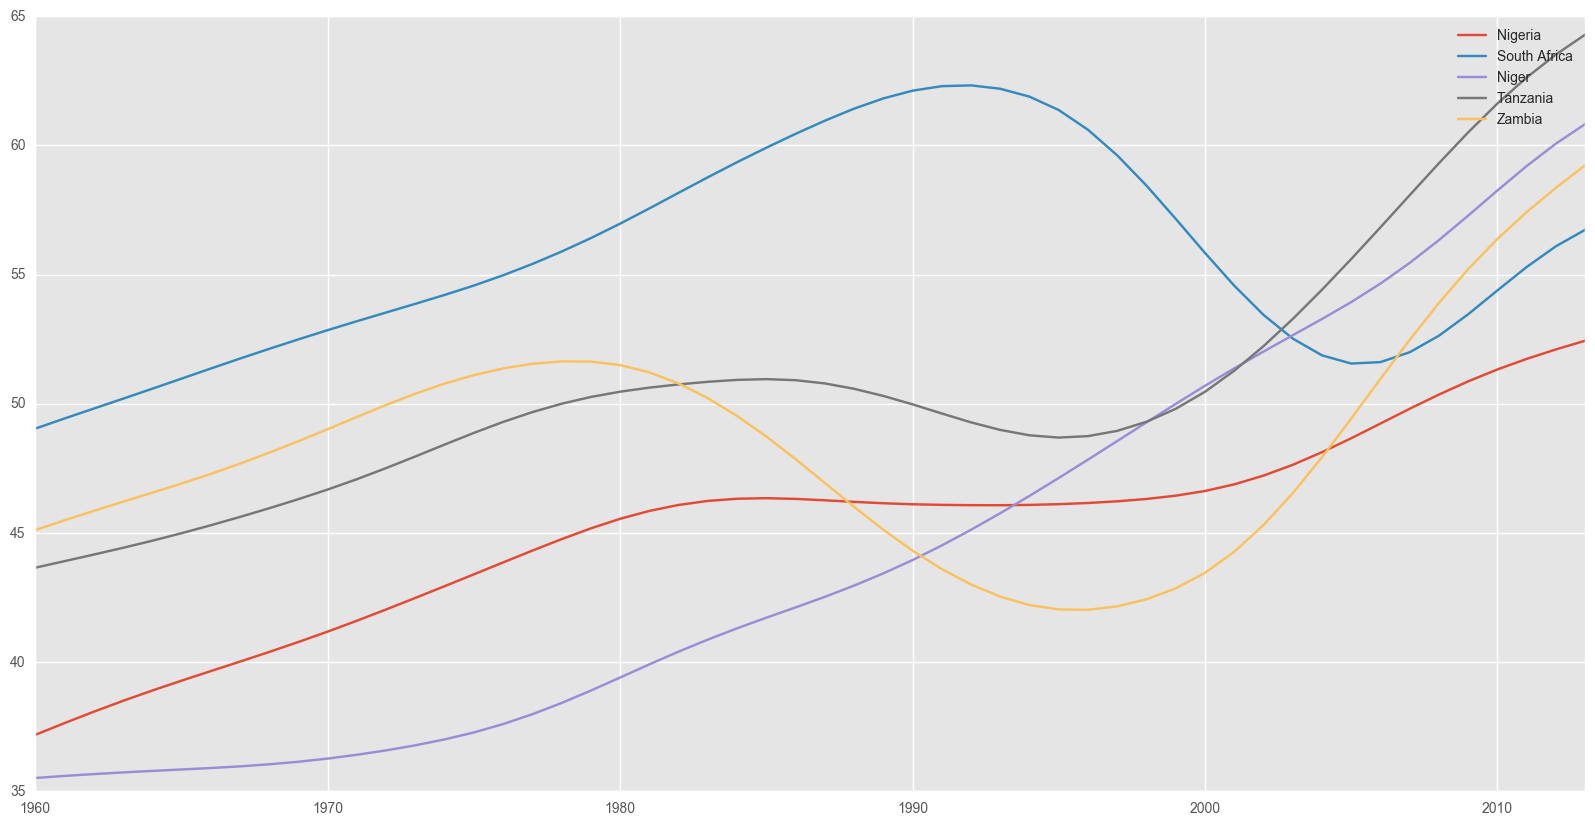

In [64]:
compare(africa)